In [782]:
import requests
from bs4 import BeautifulSoup as bs
import re
from urllib.request import unquote
import pandas as pd
import os
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [783]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [784]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [785]:
from nltk.corpus import stopwords


In [786]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bulbu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [787]:
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

In [788]:
#AMAZON.com

#Scapping incredient info
URL = "https://www.amazon.com/Panera-Bread-Broccoli-Cheddar-Soup/dp/B00P1G7S30/ref=sr_1_3_0g_na?dchild=1&keywords=panera&qid=1605806864&s=grocery&sr=1-3#customerReviews"
#positive reviews
URL_2 = "https://www.amazon.com/Panera-Bread-Broccoli-Cheddar-Soup/product-reviews/B00P1G7S30/ref=cm_cr_arp_d_viewpnt_lft?ie=UTF8&reviewerType=all_reviews&filterByStar=positive&pageNumber=1"
URL_3 = "https://www.amazon.com/Panera-Bread-Broccoli-Cheddar-Soup/product-reviews/B00P1G7S30/ref=cm_cr_arp_d_viewpnt_lft?ie=UTF8&reviewerType=all_reviews&filterByStar=positive&pageNumber=2"

#critical reviews
URL_4 = "https://www.amazon.com/Panera-Bread-Broccoli-Cheddar-Soup/product-reviews/B00P1G7S30/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=1"

webpage_1 = requests.get(URL, headers=HEADERS)
webpage_2 = requests.get(URL_2, headers=HEADERS)
webpage_3 = requests.get(URL_3, headers=HEADERS)
webpage_4 = requests.get(URL_4, headers=HEADERS)


In [789]:
#WALMART.com
URL_5 = "https://www.walmart.com/reviews/product/149497304"
URL_6 = "https://www.walmart.com/reviews/product/149497304?page=2"


webpage_5 = requests.get(URL_5, headers=HEADERS)
webpage_6 = requests.get(URL_6, headers=HEADERS)

In [790]:
result_incredient

<Response [503]>

In [791]:
soup_1 = bs(webpage_1.content, "lxml")
soup_2 = bs(webpage_2.content, "lxml")
soup_3 = bs(webpage_3.content, "lxml")
soup_4 = bs(webpage_4.content, "lxml")


In [792]:
soup_5 = bs(webpage_5.content, "lxml")
soup_6 = bs(webpage_6.content, "lxml")

In [793]:
ab_1 = soup_1.find("div", {"class": "a-section content"})

In [794]:
ab_2 = soup_2.find_all("div",{"class": "a-section celwidget"})
ab_3 = soup_3.find_all("div",{"class": "a-section celwidget"})
ab_4 = soup_4.find_all("div",{"class": "a-section celwidget"})

In [795]:
ab_2

[<div class="a-section celwidget" id="customer_review-RG2BHJ6WJ82L4"><div class="a-row a-spacing-mini" data-hook="genome-widget"><a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AHYGCHX43G6MKS2EQV2JCAC3DLUQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-na.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-na.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">jbearsea</span></div></a></div><div class="a-row"><a class="a-link-normal" href="/gp/customer-reviews/RG2BHJ6WJ82L4/ref=cm_cr_arp_d_rvw_ttl?ie=UTF8&amp;ASIN=B00P1G7S30" title="5.0 out of 5 stars"><i class=

In [796]:
#Review count
review_count = soup_1.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

review_count

'550 ratings'

In [797]:
 #Get price
price = soup_1.find("span", attrs={'id':'priceblock_ourprice'}).string.strip()

price

'$4.47'

In [798]:
incredients = ab_1.select('div > p')[1].get_text(strip=True)



#Product rating
rating = soup_1.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()

In [799]:
incredients

'Water, Milk, Broccoli, Cheddar Cheese ([Pasteurized Milk, Cheese Culture, Salt, Enzymes], Water, Sodium Phosphate, Milkfat, Salt, Apocarotenal [Color]), Heavy Cream, Carrots, Contains 2% or Less of: Seasoning (Modified Corn Starch, Flour [Wheat Flour, Ascorbic Acid Added as Dough Conditioner, Niacin, Reduced Iron, Thiamine Mononitrate, Riboflavin, Folic Acid], Salt, Spices, Extractives of Paprika), Onions, Chicken Base (Chicken Meat and Chicken Juices, Salt, Hydrolyzed Soy and Corn Protein, Sugar, Flavoring, Potato Flour, Autolyzed Yeast Extract, Carrot Powder and Turmeric), Butter (Cream, Salt), Modified Food Starch, Soybean Oil, Dijon Mustard (Water, Vinegar, Mustard Seed, Salt, White Wine, Fruit Pectin, Citric Acid, Tartaric Acid, Sugar, Spice), Nisin Preparation and Hot Pepper Sauce (Vinegar, Red Pepper, Salt).'

In [800]:
rating_positive = []
for sections in ab_2:    
    star_rating = sections.find("span",{"class": "a-icon-alt"}).string.strip()
    rating_positive.append(star_rating)
    
for sections in ab_3:    
    star_rating = sections.find("span",{"class": "a-icon-alt"}).string.strip()
    rating_positive.append(star_rating)
    



In [801]:
rating_critical = []
for sections in ab_4:    
    star_rating = sections.find("span",{"class": "a-icon-alt"}).string.strip()
    rating_critical.append(star_rating)

In [802]:
rating_critical

['1.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '1.0 out of 5 stars']

In [803]:
# rating title
title_positive = []
for sections in ab_2:    
    title_rating = sections.find("a",{"data-hook": "review-title"}).find("span").string.strip()
    title_positive.append(title_rating)

for sections in ab_3:    
    title_rating = sections.find("a",{"data-hook": "review-title"}).find("span").string.strip()
    title_positive.append(title_rating)


In [804]:
title_critical = []
for sections in ab_4:    
    title_rating = sections.find("a",{"data-hook": "review-title"}).find("span").string.strip()
    title_critical.append(title_rating)

In [805]:
title_critical

['Thick & Heated Well. Weird Chemical Taste.',
 'Four Stars',
 'not as good as from the restaurant',
 'It is not the same taste as the soup from the actual restraunt.',
 'We did not like this at all']

In [806]:
#rating body
body_positive = []
for sections in ab_2:    
    body_rating = sections.find("span",{"data-hook": "review-body"}).find("span").text.replace("\n","")
    body_positive.append(body_rating)

for sections in ab_3:    
    body_rating = sections.find("span",{"data-hook": "review-body"}).find("span").text.replace("\n","")
    body_positive.append(body_rating)

In [807]:
body_critical = []
for sections in ab_4:    
    body_rating = sections.find("span",{"data-hook": "review-body"}).find("span").text.replace("\n","")
    body_critical.append(body_rating)

In [808]:
body_critical

['  Had a weird chemical flavor. Even the mac & cheese. Maybe too many preservatives? Not sure. It was thick and heated well. But we are off Panera products, for now anyway. Nothing like homemade soup, but thought this would fit the bill for quick lunches during remote schooling.',
 '  Best of the prepared broccoli cheedars.',
 '  It was just okay, not as good as from the restaurant.',
 "  I was very excited to taste the soup and to find an alternative to eat from home. Sadly, I was very disappointed. Don't get me wrong this is at best a mediocre soup but it does not taste like the soup from Panera. I recommend just go to the restaurant and get your soup from there, it will save you time and money!",
 '  We did not like this at all. Big pieces of broccoli but only a few. Will stick to restaurant version or make my own. So sad! We really wanted this to taste fantastic.']

## Not Completed yet

In [809]:
#place of review

place_positive = []
for sections in ab_2:    
    place_rating = sections.find("a",{"class": "a-profile"}).attrs['href']
    
    place_positive.append(place_rating)


In [810]:
place_positive

['/gp/profile/amzn1.account.AHYGCHX43G6MKS2EQV2JCAC3DLUQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AEUO47SA6V56YJI3NB4LZS7FA5PA/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AFIQHKBRR6AQAOYJWZR4RVJGN65Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AEXFLW4TL2V6VYTVHEBS6GFRRXMQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AHOCW7QV2K5GHSNBEAMGU4HHYKFA/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AECIWUWK4HBRMIKPKCVPBRSXOOTQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AFI6POWZ2KJPKNSLGYHSVGR4SFEQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AGEDPPVXDB5TDS44KXFA27QWKISQ/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AF5KXRHPUR2GINFVVRU23K4SLPSA/ref=cm_cr_arp_d_gw_btm?ie=UTF8',
 '/gp/profile/amzn1.account.AFDODE3VK3ZVXJHWIH53QGQLU6YA/ref=cm_cr_arp_d_gw_btm?ie=UTF8']

In [811]:
base_url = "https://www.amazon.com/"
url_1 = base_url + place_positive[2] 

In [823]:
url_1

'https://www.amazon.com//gp/profile/amzn1.account.AFIQHKBRR6AQAOYJWZR4RVJGN65Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8'

In [815]:
import urllib2
from BeautifulSoup import BeautifulSoup

# Fetch URL
url = 'https://www.amazon.com//gp/profile/amzn1.account.AFIQHKBRR6AQAOYJWZR4RVJGN65Q/ref=cm_cr_arp_d_gw_btm?ie=UTF8'
request = urllib2.Request(url)
request.add_header('Accept-Encoding', 'utf-8')

# Response has UTF-8 charset header,
# and HTML body which is UTF-8 encoded
response = urllib2.urlopen(request)

# Parse with BeautifulSoup
soup = bs(response)

ModuleNotFoundError: No module named 'urllib2'

In [836]:
webpage_5 = requests.get(url_1, headers=HEADERS)

In [847]:
soup_5 = bs(webpage_5.content, "html.parser")

In [848]:
soup_5

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a

In [827]:
ab_7 = soup_5.find_all("span",{"class": "a-size-base a-color-base"})

In [828]:
ab_7

[]

In [655]:
rating_positive_2 = []
for i in rating_positive:    
    rating_positive_2.append(i.split(" ")[0])
    
rating_critical_2 = []
for i in rating_critical:    
    rating_critical_2.append(i.split(" ")[0])

In [656]:
rating_critical_2

['1.0', '3.0', '3.0', '3.0', '1.0']

In [657]:

ab_5 = soup_5.find_all("div",{"class":"Grid-col customer-review-body"})
ab_6 = soup_6.find_all("div",{"class":"Grid-col customer-review-body"})

In [658]:
#rating
rating_walmart = []
for sections in ab_5:
    rating_walmart.append(sections.find("span", {"class": "visuallyhidden seo-avg-rating"}).string.strip())
for sections in ab_6:
    rating_walmart.append(sections.find("span", {"class": "visuallyhidden seo-avg-rating"}).string.strip())
    
#title

title_walmart = []
for sections in ab_5:
    try:
        title_walmart.append(sections.find("h3", {"class": "review-title font-bold"}).string.strip())
    except:
        pass
for sections in ab_6:
    try:
        title_walmart.append(sections.find("h3", {"class": "review-title font-bold"}).string.strip())
    except:
        pass
    
#body
body_walmart = []
for sections in ab_5:
    try:
        body_walmart.append(sections.find("div", {"class": "review-text"}).select('div > p')[0].get_text(strip=True))
    except:
        pass
for sections in ab_6:
    try:
        body_walmart.append(sections.find("div", {"class": "review-text"}).select('div > p')[0].get_text(strip=True))
    except:
        pass

    

In [659]:
#many r missing
title_walmart_dict = {"Title": title_walmart}
rating_walmart_dict = {"Rating": rating_walmart}
body_walmart_dict = {"Body": body_walmart}


In [660]:
       
total_ratings_list = rating_positive_2 + rating_critical_2 + rating_walmart
total_title_list = title_positive +  title_critical + title_walmart
total_body_list = body_walmart + body_positive + body_critical

In [661]:
rating_walmart

['5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '1.0',
 '5.0',
 '4.0',
 '5.0',
 '5.0',
 '5.0',
 '3.0',
 '5.0',
 '5.0',
 '2.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '5.0',
 '1.0']

In [662]:
title_walmart = soup_5.find_all("div", {"class": "review-text"})
title_walmart_2 = soup_6.find_all("div", {"class": "review-text"})


In [663]:
len(title_walmart)



20

In [664]:
mydict_positive = {"Rating": rating_positive_2, "Title": title_positive,"Body": body_positive}
mydict_critical = {"Rating": rating_critical_2, "Title": title_critical,"Body": body_critical}

In [665]:
df_positive =pd.DataFrame.from_dict(mydict_positive)
df_critical =pd.DataFrame.from_dict(mydict_critical)

In [666]:
df_rating = pd.DataFrame.from_dict({"Rating": total_ratings_list})
df_title = pd.DataFrame.from_dict({"Title": total_title_list})
df_body = pd.DataFrame.from_dict({"Body": total_body_list})

In [667]:
df_rating

,Rating
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
5,4.0
6,5.0
7,5.0
8,5.0
9,5.0


In [668]:
df_positive

,Rating,Title,Body
0,5.0,At first I wasn't sure if I liked this soup,At first I wasn't sure if I liked this soup....
1,5.0,Guilty Fat Pleasure,"Guilty, guilty, guilty pleasure! Tastes so ..."
2,5.0,Tasty soup for a tasty gal,Quite tasty when you are in a hurry. Or eve...
3,5.0,Best soup ever,OMGGGG THIS IS AMAZING!!!I added more cheese...
4,5.0,Yummy creamy broccoli & cheese soup,My kids loved it. Portions are generous. I s...
5,4.0,Good but too much sugar.,12g of sugar too much for a diabetic. Sure t...
6,5.0,Great soup!!,Love this soup!!!
7,5.0,DELIGHTFUL,"A lovely soup, delicious and thick but not t..."
8,5.0,I will be buying this great soup again,I really enjoyed this product. The soup has...
9,5.0,Alto precio,Siempre deliciosa


In [669]:
#lowercase
def lowercase_text(text):
    text = text.lower()
    return text
df_positive['Title'] = df_positive['Title'].apply(lambda x : lowercase_text(x))
df_critical['Title'] = df_critical['Title'].apply(lambda x : lowercase_text(x))

df_positive['Body'] = df_positive['Body'].apply(lambda x : lowercase_text(x))
df_critical['Body'] = df_critical['Body'].apply(lambda x : lowercase_text(x))

df_title['Title'] = df_title['Title'].apply(lambda x : lowercase_text(x))
df_body['Body'] = df_body['Body'].apply(lambda x : lowercase_text(x))


In [670]:
#Remove punctuations
def remove_punctuation(text):
    text_no_punctuation = "".join([c for c in text if c not in string.punctuation])
    return text_no_punctuation

df_positive['Title'] = df_positive['Title'].apply(lambda x : remove_punctuation(x))
df_critical['Title'] = df_critical['Title'].apply(lambda x : remove_punctuation(x))

df_positive['Body'] = df_positive['Body'].apply(lambda x : remove_punctuation(x))
df_critical['Body'] = df_critical['Body'].apply(lambda x : remove_punctuation(x))


df_title['Title'] = df_title['Title'].apply(lambda x : remove_punctuation(x))
df_body['Body'] = df_body['Body'].apply(lambda x : remove_punctuation(x))

In [671]:
# Tokenizing the training and the test set

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

df_positive['Title'] = df_positive['Title'].apply(lambda x : tokenizer.tokenize(x))
df_critical['Title'] = df_critical['Title'].apply(lambda x : tokenizer.tokenize(x))

df_positive['Body'] = df_positive['Body'].apply(lambda x : tokenizer.tokenize(x))
df_critical['Body'] = df_critical['Body'].apply(lambda x : tokenizer.tokenize(x))

df_title['Title'] = df_title['Title'].apply(lambda x : tokenizer.tokenize(x))
df_body['Body'] = df_body['Body'].apply(lambda x : tokenizer.tokenize(x))



In [672]:
#Remove stopwords
def remove_stopwords(text):
        
    words = [w for w in text if w not in stopwords.words('english')]
    return words


df_positive['Title'] = df_positive['Title'].apply(lambda x : remove_stopwords(x))
df_critical['Title'] = df_critical['Title'].apply(lambda x : remove_stopwords(x))

df_positive['Body'] = df_positive['Body'].apply(lambda x : remove_stopwords(x))
df_critical['Body'] = df_critical['Body'].apply(lambda x : remove_stopwords(x))


df_title['Title'] = df_title['Title'].apply(lambda x : remove_stopwords(x))
df_body['Body'] = df_body['Body'].apply(lambda x : remove_stopwords(x))


In [673]:
df_body

,Body
0,"[im, food, snob, comes, soup, stuff, lovely, p..."
1,"[would, never, know, store, bought, excellent,..."
2,"[high, sodium, taste, really, good, add, extra..."
3,"[taste, like, restaurant]"
4,"[bought, sub, sandwiches, pair, broccoli, soup..."
5,"[soup, never, fills, im, overweight, love, foo..."
6,"[soup, 16oz, really, filling, good, craving, s..."
7,"[soup, awesome, money, well, spent, creamy, br..."
8,"[delicious, almost, good, store, version, yum]"
9,"[look, bugs]"


In [674]:
#Words in Title
title_list = df_positive['Title'].tolist()
body_list = df_positive['Body'].tolist()
title_total = df_title['Title'].tolist()
body_total = df_body['Body'].tolist()
rating_total = df_rating['Rating'].tolist()



In [675]:
title_total_list = title_total[0] + title_total[1] + title_total[2] + title_total[3] + title_total[4]+ title_total[5] + title_total[6]+ title_total[7] + title_total[8]+ title_total[9] + title_total[10]+ title_total[11] + title_total[12]+ title_total[13] + title_total[14]+ title_total[15] + title_total[16]+ title_total[17] + title_total[18]+ title_total[19] + title_total[20]+ title_total[21] + title_total[22]+ title_total[23] + title_total[24]+ title_total[25] + title_total[26]+ title_total[27] + title_total[28]+ title_total[29] + title_total[30]+ title_total[31] + title_total[32]+ title_total[33] + title_total[34]+ title_total[35] 
body_total_list = body_total[0] + body_total[1] + body_total[3]+ body_total[4] + body_total[5]+ body_total[6] + body_total[7]+ body_total[8] + body_total[9]+ body_total[10] + body_total[11]+ body_total[12] + body_total[13]+ body_total[14] + body_total[15]+ body_total[16] + body_total[17]+ body_total[18] + body_total[19]+ body_total[20] + body_total[21]+ body_total[22] + body_total[23]+ body_total[24] + body_total[25]+ body_total[26] + body_total[27]+ body_total[28] + body_total[29]+ body_total[30] + body_total[31]+ body_total[32] + body_total[33]+ body_total[34] + body_total[35]+ body_total[36] + body_total[37]+ body_total[38] + body_total[39]+ body_total[40] + body_total[41]+ body_total[42] 

In [676]:
len(rating_total)

59

In [677]:
title_list[0]

['first', 'wasnt', 'sure', 'liked', 'soup']

In [678]:
all_words_title = title_list[0] + title_list[1] + title_list[2] + title_list[3] +  title_list[4] + title_list[5] + title_list[6] + title_list[7] + title_list[8] + title_list[9] + title_list[10] + title_list[11] + title_list[12] + title_list[13] + title_list[14] + title_list[15]
all_words_body = body_list[0] + body_list[1] + body_list[2] + body_list[3] +  body_list[4] + body_list[5] + body_list[6] + body_list[7] + body_list[8] + body_list[9] + body_list[10] + body_list[11] + body_list[12] + body_list[13] + body_list[14] + body_list[15]

In [679]:
body_total_list

['im',
 'food',
 'snob',
 'comes',
 'soup',
 'stuff',
 'lovely',
 'price',
 'ease',
 'prep',
 'soup',
 'absolutley',
 'fantastic',
 'like',
 'homemade',
 'soup',
 'without',
 'prep',
 'work',
 'love',
 'would',
 'never',
 'know',
 'store',
 'bought',
 'excellent',
 'quality',
 'taste',
 'fresh',
 'go',
 'comfort',
 'snack',
 'rainy',
 'day',
 'taste',
 'like',
 'restaurant',
 'bought',
 'sub',
 'sandwiches',
 'pair',
 'broccoli',
 'soup',
 'potato',
 'soup',
 'pigged',
 'soups',
 'meal',
 'theirselves',
 'one',
 'bowl',
 'enough',
 'one',
 'hungry',
 'person',
 '2',
 'people',
 'eating',
 'sandwich',
 'salad',
 'almost',
 'good',
 'going',
 'restaurant',
 'better',
 'shelf',
 'brand',
 'im',
 'plus',
 'size',
 'cutie',
 'know',
 'foodtrust',
 'absolutely',
 'love',
 'dont',
 'send',
 'unopen',
 'cups',
 'soup',
 'never',
 'fills',
 'im',
 'overweight',
 'love',
 'food',
 '5â',
 '11â',
 '145lbs',
 'soup',
 'really',
 'hits',
 'spot',
 'super',
 'filling',
 'alone',
 'im',
 'really',
 's

In [680]:
count_title = []

for i in range(len(all_words_title)):
    count_title.append(all_words_title.count(all_words_title[i]))

In [681]:
count_body = []

for i in range(len(all_words_body)):
    count_body.append(all_words_body.count(all_words_body[i]))

In [682]:
count_title_total = []

for i in range(len(title_total_list)):
    count_title_total.append(title_total_list.count(title_total_list[i]))

In [683]:
count_body_total = []

for i in range(len(body_total_list)):
    count_body_total.append(body_total_list.count(body_total_list[i]))

In [684]:
len(body_total_list)

523

In [685]:
count_ratings_total = []

for i in range(len(rating_total)):
    count_ratings_total.append(rating_total.count(rating_total[i]))

In [686]:
len(body_total_list)

523

In [687]:
title_dict = {"Words": title_total_list, "Count": count_title_total}

In [688]:
body_dict = {"Words": body_total_list, "Count": count_body_total}

In [689]:
rating_dict = {"Rating": rating_total, "Count": count_ratings_total}

In [690]:
df_title = pd.DataFrame.from_dict(title_dict)

In [691]:
df_body = pd.DataFrame.from_dict(body_dict)

In [692]:
df_rating = pd.DataFrame.from_dict(rating_dict)

In [693]:
df_rating = df_rating.drop_duplicates()
df_body = df_body.drop_duplicates()
df_title= df_title.drop_duplicates()

In [702]:
def combine_text(list_of_text):
    combine_text = ' '.join(list_of_text)
    return combine_text


df_positive['Title'] = df_positive['Title'].apply(lambda x : combine_text(x))
df_critical['Title'] = df_critical['Title'].apply(lambda x : combine_text(x))

df_positive['Body'] = df_positive['Body'].apply(lambda x : combine_text(x))
df_critical['Body'] = df_critical['Body'].apply(lambda x : combine_text(x))

In [697]:
df_body

,Words,Count
0,im,8
1,food,2
2,snob,1
3,comes,1
4,soup,29
...,...,...
507,save,1
512,pieces,1
514,stick,1
518,sad,1


In [698]:
df_title.to_csv(r'C:/Users/bulbu/Documents/Native Argtech/Title.csv')
df_body.to_csv(r'C:/Users/bulbu/Documents/Native Argtech/Body.csv')
df_rating.to_csv(r'C:/Users/bulbu/Documents/Native Argtech/Ratings.csv')

In [737]:
df_positive.to_csv(r'C:/Users/bulbu/Documents/Native Argtech/Positive.csv')
df_critical.to_csv(r'C:/Users/bulbu/Documents/Native Argtech/Critical.csv')

In [699]:
df_body

,Words,Count
0,im,8
1,food,2
2,snob,1
3,comes,1
4,soup,29
...,...,...
507,save,1
512,pieces,1
514,stick,1
518,sad,1


In [696]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [738]:
df_positive


,Rating,Title,Body
0,5.0,first wasnt sure liked soup,first wasnt sure liked soup much lighter tradi...
1,5.0,guilty fat pleasure,guilty guilty guilty pleasure tastes good next...
2,5.0,tasty soup tasty gal,quite tasty hurry even youre lazy make homemad...
3,5.0,best soup ever,omgggg amazingi added cheese adobo seasoning
4,5.0,yummy creamy broccoli cheese soup,kids loved portions generous split one 2 kids ...
5,4.0,good much sugar,12g sugar much diabetic sure list container 6g...
6,5.0,great soup,love soup
7,5.0,delightful,lovely soup delicious thick thick
8,5.0,buying great soup,really enjoyed product soup plenty broccoli ch...
9,5.0,alto precio,siempre deliciosa


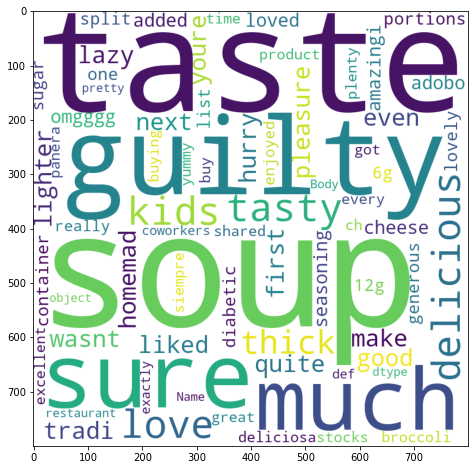

In [841]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', stopwords = set(STOPWORDS),             
                min_font_size = 5).generate(str(df_positive['Body'])) 
fig = plt.figure(1, figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()
wordcloud.to_file(r'C:/Users/bulbu/Documents/Native Argtech/Positive_wordcloud.png')

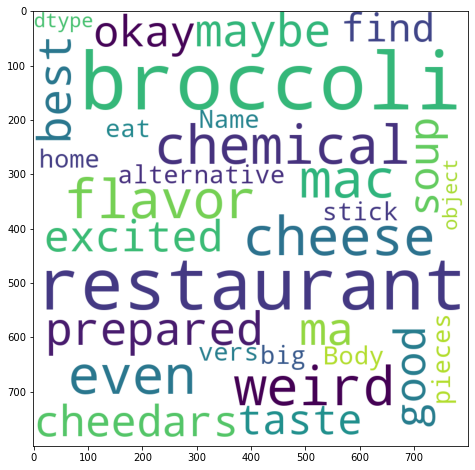

In [842]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', stopwords = set(STOPWORDS),             
                min_font_size = 5).generate(str(df_critical['Body'])) 
fig = plt.figure(1, figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()
wordcloud.to_file(r'C:/Users/bulbu/Documents/Native Argtech/Critical_wordcloud.png')